In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
input_data = iris.data.features 
output_data = iris.data.targets 

In [2]:
input_data

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
output_data

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [4]:
output_data = pd.factorize(output_data['class'])
output_data_array = [int(i) for i in output_data[0]]

In [5]:
input_data_array = [[float(sl), float(sw), float(pl), float(pw)] for sl, sw, pl, pw in zip(input_data['sepal length'], input_data['sepal width'], input_data['petal length'], input_data['petal width'])]
print(input_data_array)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(input_data_array))

normalized_input_data = scaler.transform(input_data_array)

print(normalized_input_data)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [7]:
from random import shuffle
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()

indexes = [i for i in range(len(input_data))]
shuffle(indexes)
train_indexes = indexes[:int(0.7 * len(input_data))]
test_indexes = indexes[int(0.7 * len(input_data)):]

input_train_data = [normalized_input_data[i] for i in range(len(normalized_input_data)) if i in train_indexes]
output_train_data = [output_data_array[i] for i in range(len(output_data_array)) if i in train_indexes]
input_test_data = [normalized_input_data[i] for i in range(len(normalized_input_data)) if i in test_indexes]
output_test_data = [output_data_array[i] for i in range(len(output_data_array)) if i in test_indexes]

print(input_train_data)

model.fit(input_train_data, output_train_data)

predicted = model.predict(input_test_data)
print(predicted)

[array([-1.14301691, -0.1249576 , -1.3412724 , -1.31297673]), array([-1.38535265,  0.33784833, -1.39813811, -1.31297673]), array([-1.50652052,  0.10644536, -1.2844067 , -1.31297673]), array([-0.53717756,  1.95766909, -1.17067529, -1.05003079]), array([-1.50652052,  0.80065426, -1.3412724 , -1.18150376]), array([-1.02184904,  0.80065426, -1.2844067 , -1.31297673]), array([-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]), array([-1.26418478,  0.80065426, -1.227541  , -1.31297673]), array([-1.26418478, -0.1249576 , -1.3412724 , -1.4444497 ]), array([-1.87002413, -0.1249576 , -1.51186952, -1.4444497 ]), array([-0.05250608,  2.18907205, -1.45500381, -1.31297673]), array([-0.17367395,  3.11468391, -1.2844067 , -1.05003079]), array([-0.53717756,  1.95766909, -1.39813811, -1.05003079]), array([-0.90068117,  1.03205722, -1.3412724 , -1.18150376]), array([-0.17367395,  1.72626612, -1.17067529, -1.18150376]), array([-0.53717756,  0.80065426, -1.17067529, -1.31297673]), array([-1.50652052,  1.

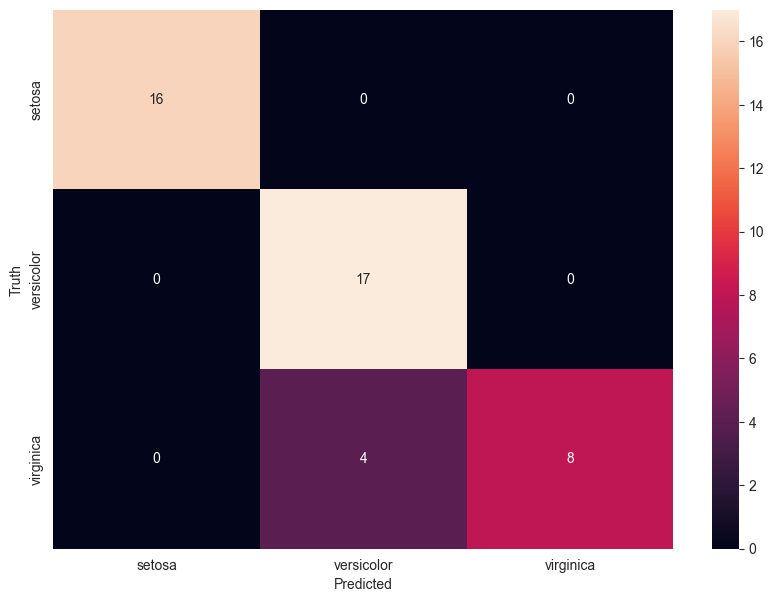

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(output_test_data, predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["setosa", "versicolor", "virginica"], yticklabels=["setosa", "versicolor", "virginica"])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(predicted, output_test_data)
print(f"The error is {error}")

The error is 0.08888888888888889


In [10]:
result = model.predict(scaler.transform([[5.35, 3.85, 1.25, 0.4]]))
if result == 0:
    print("setosa")
elif result == 1:
    print("versicolor")
else:
    print("virginica")

setosa
